In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

WIDTH = 28

In [3]:
figure = [(233, 149), (201, 198), (139, 265), (112, 297), (112, 298), (116, 298), (168, 306), (256, 315), (303, 319), (314, 316), (316, 312), (314, 301), (303, 272), (284, 226), (260, 185), (245, 154), (240, 144), (240, 144), (240, 144)]
x = [i[0] for i in figure]
y = [i[1] for i in figure]
center = (np.mean(x), np.mean(y))

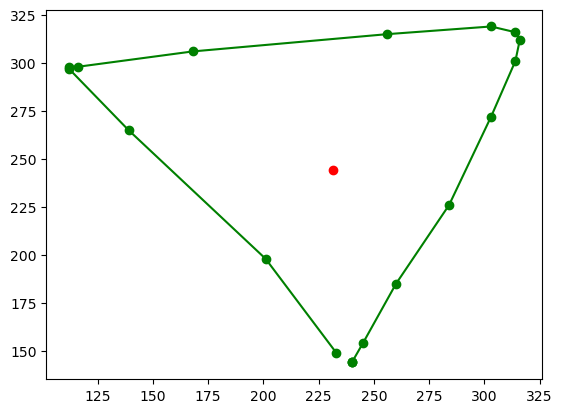

In [5]:
plt.plot(x, y, marker="o", c="g")
plt.scatter(center[0], center[1], color="red") # plotting single point
plt.show()

# Посмотрит на расстояние до центра

Нормализуем расстояния, чтобы дальнейшие расчеты не зависили от размера фигуры

In [14]:
def euclidian_distance(first, second):
    return math.sqrt((second[0] - first[0])**2 + (second[1] - first[1])**2)

def normalization(figure, center, integer=False):
    res_figure = [None] * len(figure)
    min_x = min([i[0] for i in figure])
    min_y = min([i[1] for i in figure])

    for i in range(len(figure)):
        res_figure[i] = (figure[i][0] - min_x, figure[i][1] - min_y)

    koef = (WIDTH - 2) / max([i[0] for i in res_figure])

    for i in range(len(figure)):
        if integer:
            res_figure[i] = (int(res_figure[i][0] * koef) + 1, int(res_figure[i][1] * koef) + 1)
        else:
            res_figure[i] = (res_figure[i][0] * koef + 1, res_figure[i][1] * koef + 1)
        
    
    return res_figure, ((center[0] - min_x) * koef, (center[1] - min_y) * koef)

In [7]:
figure_norm, center_norm = normalization(figure, center)

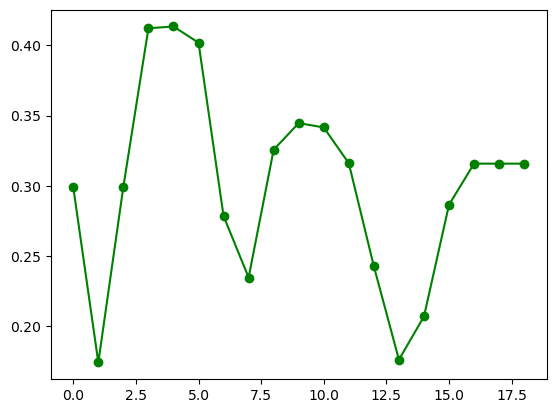

In [8]:
distances = [euclidian_distance(i, center_norm) for i in figure_norm]
indexes = list(range(len(distances)))
plt.plot(indexes, distances, marker="o", c="g")
plt.show()

# Конвертировать в изображение

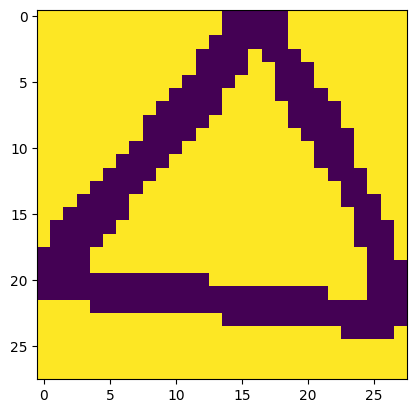

In [15]:
import cv2
def convert_to_image(figure, center):
    res_figure, _ = normalization(figure, center, integer=True)
    blank_image = np.zeros((WIDTH, WIDTH), np.uint8)
    blank_image[:, :] = 255
    for i in range(len(res_figure) - 1):
        cv2.line(blank_image, res_figure[i], res_figure[i+1], 0, 2)
    return blank_image

blank_image = convert_to_image(figure, center)
plt.imshow(blank_image)
plt.show()

In [18]:
cv2.imwrite("da.jpg", blank_image)

True